# Sprawozdanie z laboratorium fizycznego 

## Ćwiczenie nr E10

Wyznaczanie krzywej ładowania kondensatora 

### Cel ćwiczenia

Celem ćwiczenia jest zbadanie przebiegu procesu ładowania kondensatora oraz  
wyznaczenie stałej czasowej szeregowego układu RC.

### Opis badanego zjawiska

Proces ładowania kondensatora w układzie RC (rezystor-kondensator) opisuje, jak kondensator gromadzi ładunek podczas podłączania do źródła prądu.  
Stała czasowa w takim układzie wyznacza, jak szybko kondensator się ładuje lub rozładowuje.

### Wzory i zależności

***τ = R⋅C***

gdzie:

- **R** to rezystancja w obwodzie (w ohmach),
- **C** to pojemność kondensatora (w faradach),
- **τ** to stała czasowa (w sekundach)

### Schemat układu pomiarowego

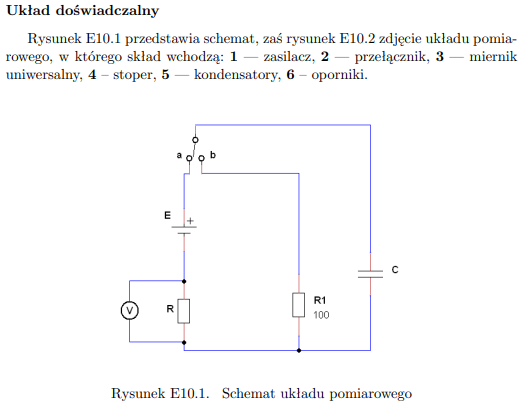

In [18]:
# Zaimportowanie potrzebnych modułów
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ścieżki do katalogu z danymi
TASK_1_PATH = 'data/task1'
TASK_2_PATH = 'data/task2'


# Stałe do prowadzenia obliczeń
EMF = 12
R = 1000000

# Funcja zwaracjąca ramkę DataFrame w zależności od podanego pliku CSV
def get_data_frame(file_name: str) -> pd.DataFrame:

    # Załadowanie danych z pliku CSV
    csv_data = pd.read_csv(f'{file_name}', sep=';')
    
    # Stowrzenie ramki danych 
    csv_df = pd.DataFrame(csv_data)

    # Zwrócenie gotowej ramki
    return csv_df


# Funkcja wyświetlająca wykres o zadanym tytule z zadanej ramki
def plot_from_df(
    *, 
    title: str, 
    df: pd.DataFrame, 
    x_name: str, 
    y_name: str, 
    x_label: str, 
    y_label: str
) -> None:

    # Wybranie potrzebnej kolumny
    plt.plot(df[x_name], df[y_name])

    # Ustawienie etykiet osi
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Wyświetl wykres
    plt.show()


# Funkcja wyświetlająca dane z trzech ramek pomiarów na jednym wykresie
def plot_from_multiple_dfs(
    *,
    title: str,
    dfs: (pd.DataFrame),
    x_name: str,
    y_name: str,
    x_label: str, 
    y_label: str
) -> None:

    for i, df in enumerate(dfs):
        plt.plot(df[x_name], df[y_name], label=f'pomiar {i + 1}')
    
    # Adding labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the legend
    plt.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()


# Funkcja licząca stałą czasową dla danej ramki t i V
def calculate_rc(df: pd.DataFrame) -> None:
    df['rc'] = - (df['t'] / np.log(1 - (df['v'] / EMF)))


# Funkcja licząca stałą czasową dla danej ramki t i V
def calculate_c(df: pd.DataFrame) -> None:
    df['c'] = df['rc'] / R
                  

## Ćwiczenie E10.1

---

### Pobranie danych z trzech pomiarów do zadania pierwszego

In [19]:
# Pobranie danych z pomiaru 1
mesurement_1_1 = get_data_frame(f'{TASK_1_PATH}/data1.csv')

# Pobranie danych z pomiaru 1
mesurement_1_2 = get_data_frame(f'{TASK_1_PATH}/data2.csv')

# Pobranie danych z pomiaru 1
mesurement_1_3 = get_data_frame(f'{TASK_1_PATH}/data3.csv')


### Wykreślenie danych z wszystkiech pomiarów

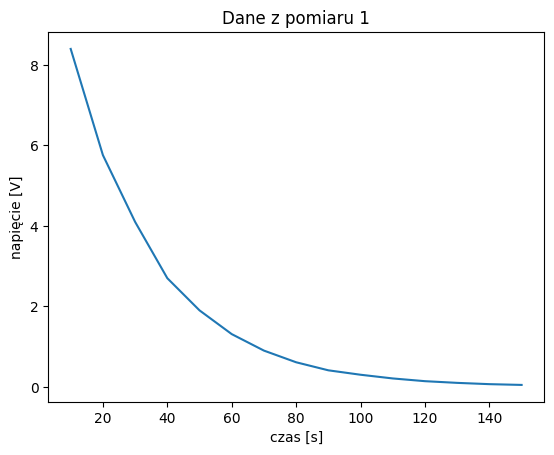

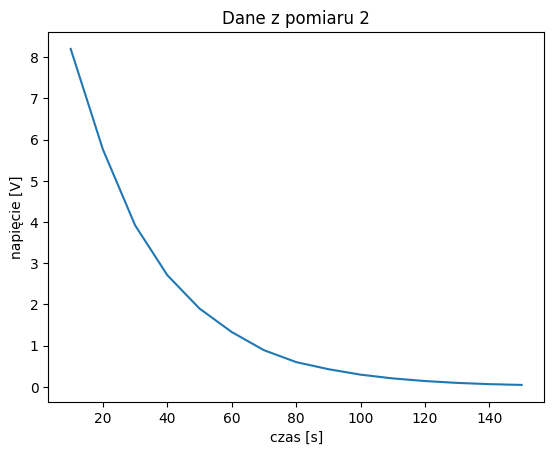

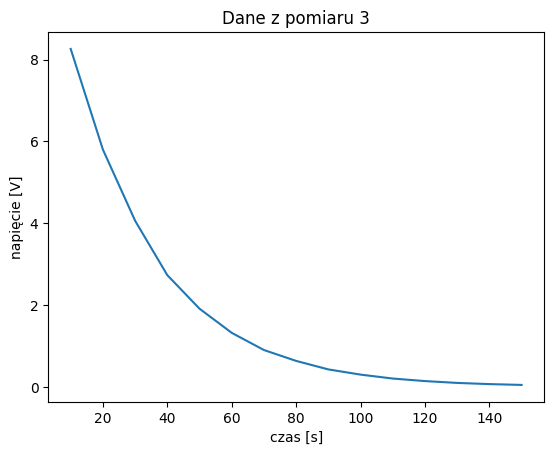

In [20]:
# Wyświetlenie wyników trzech pomiarów

# Wyświetlenie danych z pomiaru 1
plot_from_df(
    title='Dane z pomiaru 1', 
    df=mesurement_1_1, 
    x_name='t', 
    y_name='v', 
    x_label='czas [s]', 
    y_label='napięcie [V]'
)


# Wyświetlenie danych z pomiaru 2
plot_from_df(
    title='Dane z pomiaru 2', 
    df=mesurement_1_2, 
    x_name='t', 
    y_name='v', 
    x_label='czas [s]', 
    y_label='napięcie [V]'
)


# Wyświetlenie danych z pomiaru 2
plot_from_df(
    title='Dane z pomiaru 3', 
    df=mesurement_1_3, 
    x_name='t', 
    y_name='v', 
    x_label='czas [s]', 
    y_label='napięcie [V]'
)

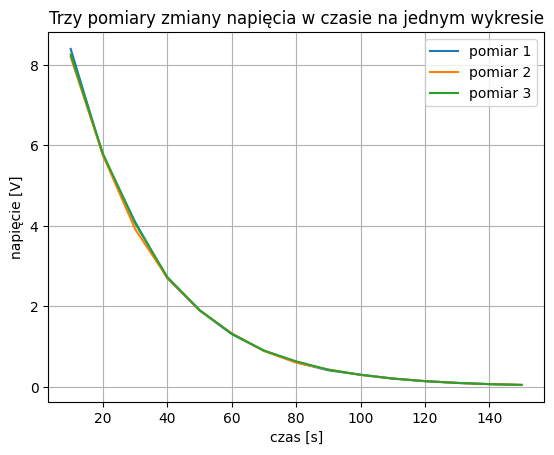

In [21]:
# Ponieważ trzy pomiary zostały wykonane w podobnych warunkach i ciężko jest dostrzec różnicę na osobnych wykresach, 
# sprowadźmy wszystkie dane do jednego.

# Narysowanie wykresu z trzech pomiarów na raz
plot_from_multiple_dfs(
    title='Trzy pomiary zmiany napięcia w czasie na jednym wykresie',
    dfs=(mesurement_1_1, mesurement_1_2, mesurement_1_3),
    x_name='t',
    y_name='v',
    x_label='czas [s]', 
    y_label='napięcie [V]'
)

### Komentarz

Trzy przeprowadzone pomiary są bardzo podobne do siebie, co oznacza, że zostały przeprowadzone w tych samych warunkach i w ten sam sposób.

## Ćwiczenie E10.2

---

### Pobranie i wyświetlenie danych

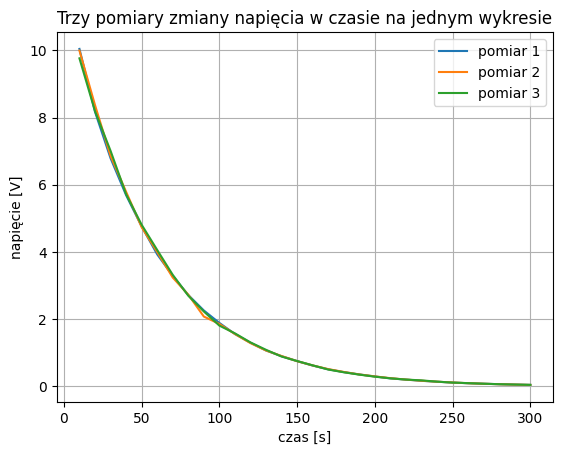

In [22]:
# Ponieważ trzy pomiary zostały wykonane w podobnych warunkach i ciężko jest dostrzec różnicę na osobnych wykresach, 
# sprowadźmy wszystkie dane do jednego.

# Pobranie danych i utworzenie DataFrame
mesurement_2_1 = get_data_frame(f'{TASK_2_PATH}/data1.csv')

# Pobranie danych i utworzenie DataFrame
mesurement_2_2 = get_data_frame(f'{TASK_2_PATH}/data2.csv')

# Pobranie danych i utworzenie DataFrame
mesurement_2_3 = get_data_frame(f'{TASK_2_PATH}/data3.csv')

# Narysowanie wykresu z trzech pomiarów na raz
plot_from_multiple_dfs(
    title='Trzy pomiary zmiany napięcia w czasie na jednym wykresie',
    dfs=(mesurement_2_1, mesurement_2_2, mesurement_2_3),
    x_name='t',
    y_name='v',
    x_label='czas [s]', 
    y_label='napięcie [V]'
)

### Policzenie stałej czasowej i pojemności dla trzech zestawów pomiarów

In [23]:
# Dla pomiaru 1
# Policzenie stałej czasowej
calculate_rc(mesurement_2_1)

# Policzenie pojemności
calculate_c(mesurement_2_1)

# Dla pomiaru 2
# Policzenie stałej czasowej
calculate_rc(mesurement_2_2)

# Policzenie pojemności
calculate_c(mesurement_2_2)

# Dla pomiaru 1
# Policzenie stałej czasowej
calculate_rc(mesurement_2_3)

# Policzenie pojemności
calculate_c(mesurement_2_3)


### Wykreślenie wykresów na podstawie obliczonych danych

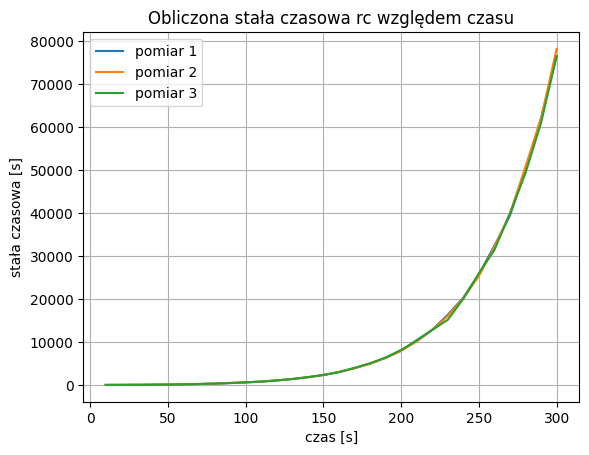

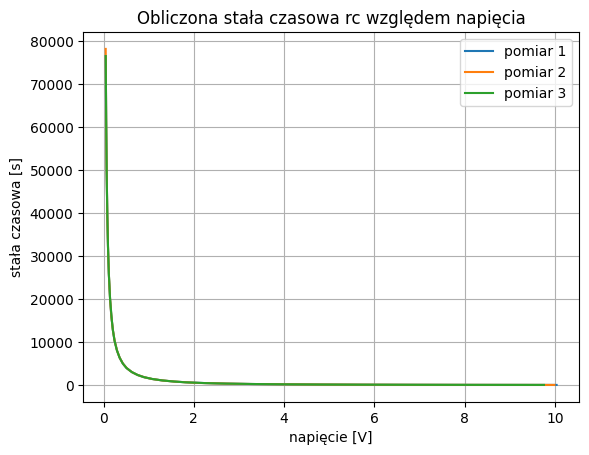

In [24]:
# Utworzenie wykresu rc względem t z trzema pomiarami
plot_from_multiple_dfs(
    title='Obliczona stała czasowa rc względem czasu',
    dfs=(mesurement_2_1, mesurement_2_2, mesurement_2_3),
    x_name='t',
    y_name='rc',
    x_label='czas [s]', 
    y_label='stała czasowa [s]'
)

# Utworzenie wykresu rc względem v z trzema pomiarami
plot_from_multiple_dfs(
    title='Obliczona stała czasowa rc względem napięcia',
    dfs=(mesurement_2_1, mesurement_2_2, mesurement_2_3),
    x_name='v',
    y_name='rc',
    x_label='napięcie [V]', 
    y_label='stała czasowa [s]'
)

### Wykreślenie wykresu stałej czasowej od pojemności

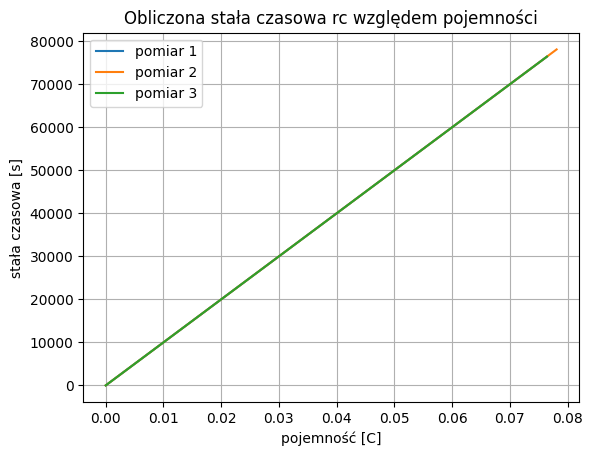

In [25]:
# Utworzenie wykresu rc względem v z trzema pomiarami
plot_from_multiple_dfs(
    title='Obliczona stała czasowa rc względem pojemności',
    dfs=(mesurement_2_1, mesurement_2_2, mesurement_2_3),
    x_name='c',
    y_name='rc',
    x_label='pojemność [C]', 
    y_label='stała czasowa [s]'
)

### Komentarz